<a href="https://colab.research.google.com/github/ReidelVichot/LC_identification/blob/main/LC_identification_Rivera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. PROBLEM DEFINITION

**Background**

“A logistics cluster (LC) is defined as the geographical concentration of firms providing logistics services, such as transportation carriers, warehousing providers, third-party logistics (3PL-s), and forwarders, as well as some other enterprises that are mainly in the logistics business, including logistics enterprises to provide services to various industries” (Rivera et al., 2014, p. 223).  

Several relevant scholars in the field of logistics claim that clustering logistic activity has a positive impact on the efficiency of the economic activity, reduction of costs, and increase of collaboration among the firms that belong to the cluster (Rivera et al., 2014; Rivera, Gligor, et al., 2016; Rivera, Sheffi, et al., 2016; Sheffi, 2013, 2012). Although some of these authors mention that some of these benefits require some trade-offs (Rivera, Gligor, et al., 2016), these trade-offs are not further explored, resulting in an incomplete understanding of the socio-economic effects of the agglomeration of logistics activity. This becomes more problematic given that governments around the world seem to be embracing the idea of logistics clusters being some sort of panacea for economic development based on supply chain management improvements (Baranowski et al., 2015; Baydar et al., 2019; Chung, 2016), even though empirical studies that assess the role of government spending on the formation of logistics clusters are lacking (Liu et al., 2022). In other words, the field still lacks methodological and theoretical development, resulting in an incomplete understanding of the mechanisms of logistical clustering and their socio-economic effects.

**Problem**

There is not a current database of logistics clusters in the US. However, Rivera et al (2014) designed a method to test logistical agglomeration in US counties using NAICS codes and [CBP](https://www.census.gov/programs-surveys/cbp.html) information. Before conducting analyis on the effects of Logistics Clusters on society and the role of governments in their formation it is necessary to have an accurate picture of all logistics clusters in the US. For this purpose, I will extend Reviera's et al (2014) methodology to all the CBP years in which NAICS codes are used and use this database for future analyses.

#2. DATA COLLECTION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
# -- files downloaded from the census CBP
dpath = "/content/drive/MyDrive/Disertation/"
fname98 = dpath + "CBP_data/cbp98co/cbp98co.txt"
fname08 = dpath + "CBP_data/cbp08co/cbp08co.txt"


In [5]:
cbp98 = pd.read_csv(fname98)
cbp08 = pd.read_csv(fname08)

In [23]:
cbp98 = cbp98[cbp98.naics.str.startswith(("48","49"))]
cbp08 = cbp08[cbp08.naics.str.startswith(("48","49"))]

#3. DATA PREPARATION

In [6]:
cols = ['fipstate', 'fipscty', 'naics', 'emp', 'est']
cbp98 = cbp98[cols]
cbp08 = cbp08[cols]

In [7]:
cbp98["year"] = 1998
cbp08["year"] = 2008

In [8]:
frames = [cbp98, cbp08]

In [9]:
cbp = pd.concat(frames)
cbp.reset_index().drop(columns="index")

,fipstate,fipscty,naics,emp,est,year
0,1,1,------,8100,754,1998
1,1,1,11----,0,12,1998
2,1,1,113///,0,8,1998
3,1,1,1131//,0,1,1998
4,1,1,11311/,0,1,1998
...,...,...,...,...,...,...
4346775,56,999,81----,0,1,2008
4346776,56,999,811///,0,1,2008
4346777,56,999,8112//,0,1,2008
4346778,56,999,81121/,0,1,2008


In [10]:
logistics_sectors = [ "481112", "481212", "481219", "483111", "483113",
                      "483211", "484110", "484121", "484122", "484220",
                      "484230", "488119", "488190", "488210", "488310",
                      "488320", "488330", "488390", "488410", "488490",
                      "488510", "488991", "488999", "492110", "492210",
                      "493110", "493190" ]

In [11]:
cbp = cbp[cbp["naics"].isin(logistics_sectors)]

In [28]:
#county = gpd.read_file(dpath + "/countyshp/tl_2023_us_county/tl_2023_us_county.shp")
county = gpd.read_file(dpath + "/countyshp/tl_2010_us_county10/tl_2010_us_county10.shp")

In [18]:
len(county)

3219

In [19]:
county.columns

Index(['STATEFP00', 'COUNTYFP00', 'CNTYIDFP00', 'NAME00', 'NAMELSAD00',
       'LSAD00', 'CLASSFP00', 'MTFCC00', 'UR00', 'FUNCSTAT00', 'ALAND00',
       'AWATER00', 'INTPTLAT00', 'INTPTLON00', 'geometry'],
      dtype='object')

In [35]:
print(len(county))
# -- remove Alaska
county = county[county["STATEFP10"] != "02"]
print(len(county))
# -- remove Hawaii
county = county[county["STATEFP10"] != "15"]
print(len(county))
# -- remove American Samoa
county = county[county["STATEFP10"] != "60"]
print(len(county))
# -- remove Guam
county = county[county["STATEFP10"] != "66"]
print(len(county))
# -- remove Northern Marianas
county = county[county["STATEFP10"] != "69"]
print(len(county))
# -- remove Puerto Rico
county = county[county["STATEFP10"] != "72"]
print(len(county))
# -- remove Virgin Islands
county = county[county["STATEFP10"] != "78"]
print(len(county))
# -- remove DC
county = county[county["STATEFP10"] != "11"]
print(len(county))

3108
3108
3108
3108
3108
3108
3108
3108
3108


<Axes: >

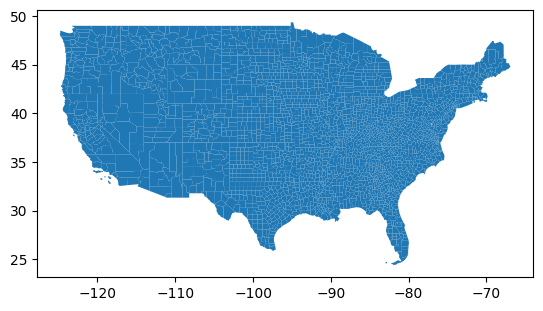

In [36]:
county.plot()

In [39]:
np.sort(county.STATEFP10.unique().astype(int))

array([ 1,  4,  5,  6,  8,  9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [ ]:
print(len(county))
# -- remove Alaska
county = county[county["STATEFP"] != "02"]
print(len(county))
# -- remove Hawaii
county = county[county["STATEFP"] != "15"]
print(len(county))
# -- remove Puerto Rico
county = county[county["STATEFP"] != "72"]
print(len(county))
# -- remove Virgin Islands
county = county[county["STATEFP"] != "78"]
print(len(county))
# -- remove American Samoa
county = county[county["STATEFP"] != "60"]
# -- remove Guam
county = county[county["STATEFP"] != "66"]
len(county)
# -- remove DC
county = county[county["STATEFP"] != "11"]
len(county)

3108
3108
3108
3108
3108


3108

In [ ]:
county.head()

,STATEFP,COUNTYFP,COUNTYNS,CNTYIDFP,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,geometry
0,19,175,00465276,19175,Union,Union County,06,H1,G4020,None,None,None,A,"POLYGON ((-94.47051 40.97504, -94.47050 40.975..."
1,19,177,00465277,19177,Van Buren,Van Buren County,06,H1,G4020,None,None,None,A,"POLYGON ((-91.96059 40.90070, -91.95925 40.900..."
2,20,097,00485013,20097,Kiowa,Kiowa County,06,H1,G4020,None,None,None,A,"POLYGON ((-99.01471 37.67895, -99.01473 37.678..."
3,20,109,00485019,20109,Logan,Logan County,06,H1,G4020,None,None,None,A,"POLYGON ((-100.89562 39.13329, -100.89404 39.1..."
4,20,003,00484971,20003,Anderson,Anderson County,06,H1,G4020,None,None,None,A,"POLYGON ((-95.51741 38.20619, -95.51741 38.206..."


In [ ]:
county = county[['CNTYIDFP', 'NAME', 'geometry']]

In [34]:
len(cbp)

47563

In [33]:
print(len(cbp))
# -- remove Alaska
cbp = cbp[cbp["fipstate"] != 2]
print(len(cbp))
# -- remove Hawaii
cbp = cbp[cbp["fipstate"] != 15]
print(len(cbp))
# -- remove Puerto Rico
cbp = cbp[cbp["fipstate"] != 72]
print(len(cbp))
# -- remove Virgin Islands
cbp = cbp[cbp["fipstate"] != 78]
print(len(cbp))
# -- remove American Samoa
cbp = cbp[cbp["fipstate"] != 60]
# -- remove Guam
cbp = cbp[cbp["fipstate"] != 66]
len(cbp)

48070
47697
47563
47563
47563


47563

In [ ]:
cbp["GEOID"] = cbp.fipstate.astype(str).str.zfill(2) + cbp.fipscty.astype(str).str.zfill(3)

AttributeError: 'DataFrame' object has no attribute 'fipstate'

In [ ]:
cbp.drop(columns=["fipstate", "fipscty"], inplace=True)

KeyError: "['fipstate', 'fipscty'] not found in axis"

In [ ]:
cbp_grouped = cbp.groupby(["year","GEOID"]).sum().reset_index()

<ipython-input-48-cb9c63088f7b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cbp_grouped = cbp.groupby(["year","GEOID"]).sum().reset_index()


In [ ]:
county = county.merge(cbp_grouped, left_on="CNTYIDFP", right_on="GEOID")

In [ ]:
county

,CNTYIDFP,NAME,geometry,year,GEOID,emp,est
0,19175,Union,"POLYGON ((-94.47051 40.97504, -94.47050 40.975...",1998,19175,0,6
1,19175,Union,"POLYGON ((-94.47051 40.97504, -94.47050 40.975...",1999,19175,3,7
2,19175,Union,"POLYGON ((-94.47051 40.97504, -94.47050 40.975...",2000,19175,0,7
3,19175,Union,"POLYGON ((-94.47051 40.97504, -94.47050 40.975...",2001,19175,0,8
4,19175,Union,"POLYGON ((-94.47051 40.97504, -94.47050 40.975...",2002,19175,8,9
...,...,...,...,...,...,...,...
71029,39061,Hamilton,"POLYGON ((-84.27514 39.28921, -84.27467 39.289...",2017,39061,9687,347
71030,39061,Hamilton,"POLYGON ((-84.27514 39.28921, -84.27467 39.289...",2018,39061,10171,358
71031,39061,Hamilton,"POLYGON ((-84.27514 39.28921, -84.27467 39.289...",2019,39061,10843,385
71032,39061,Hamilton,"POLYGON ((-84.27514 39.28921, -84.27467 39.289...",2020,39061,10096,384


In [ ]:
cbp_2008 = county[county["year"]==2008]

In [ ]:
len(cbp_2008)

3066

In [ ]:
cbp_2008["LEP"] = cbp_2008["est"]/cbp_2008["est"].sum()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

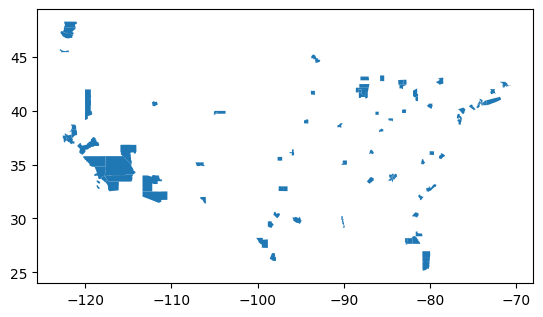

In [ ]:
cbp_2008[cbp_2008["LEP"] > 0.001717].plot()

In [ ]:
len(cbp_2008[cbp_2008["LEP"] > 0.001717])

97

In [ ]:
cbp_2008["LQ"] =

In [ ]:
for year in cbp["year"].unique():


SyntaxError: incomplete input (<ipython-input-20-aada67075807>, line 1)

#4. MACHINE LEARNING

#5. PROBLEM SOLUTION